# Implementación del algoritmo k-NN (k-Nearest Neighbors)

En este notebook, implementaremos el algoritmo k-NN desde cero y lo compararemos con la implementación de scikit-learn. Utilizaremos el dataset de vinos de scikit-learn, que es un conjunto de datos que contiene características químicas de diferentes tipos de vinos.

## Contenido:
1. Carga y preparación de datos
2. Implementación manual de k-NN
3. Visualización del funcionamiento
4. Comparación con scikit-learn
5. Análisis de resultados

In [ ]:
# Importamos las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


## 1. Carga y preparación de Datos

In [ ]:
# Cargamos el dataset de vinos
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target)

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Escalamos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('Forma de los datos de entrenamiento:', X_train_scaled.shape)
print('Forma de los datos de prueba:', X_test_scaled.shape)

Forma de los datos de entrenamiento: (142, 13)
Forma de los datos de prueba: (36, 13)


## 2. Implementación manual de k-NN

Implementaremos el algoritmo k-NN desde cero para entender mejor su funcionamiento.

In [ ]:
class SimpleKNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        """Almacena los datos de entrenamiento."""
        self.X_train = X
        self.y_train = y
        return self

    def _euclidean_distance(self, x1, x2):
        """Calcula la distancia euclidiana entre dos puntos."""
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def _get_neighbors(self, x):
        """Encuentra los k vecinos más cercanos."""
        # Calculamos distancias a todos los puntos de entrenamiento
        distances = [self._euclidean_distance(x, x_train)
                    for x_train in self.X_train]

        # Obtenemos los índices de los k vecinos más cercanos
        k_indices = np.argsort(distances)[:self.k]

        # Devolvemos las etiquetas de los k vecinos
        return self.y_train[k_indices]

    def predict(self, X):
        """Predice la clase para cada punto en X."""
        predictions = []

        for x in X:
            # Encontramos los k vecinos más cercanos
            neighbors = self._get_neighbors(x)

            # Predicción por votación mayoritaria
            prediction = max(set(neighbors), key=list(neighbors).count)
            predictions.append(prediction)

        return np.array(predictions)

## 3. Visualización del funcionamiento

Vamos a visualizar cómo funciona nuestro k-NN en un espacio bidimensional usando las dos primeras características.

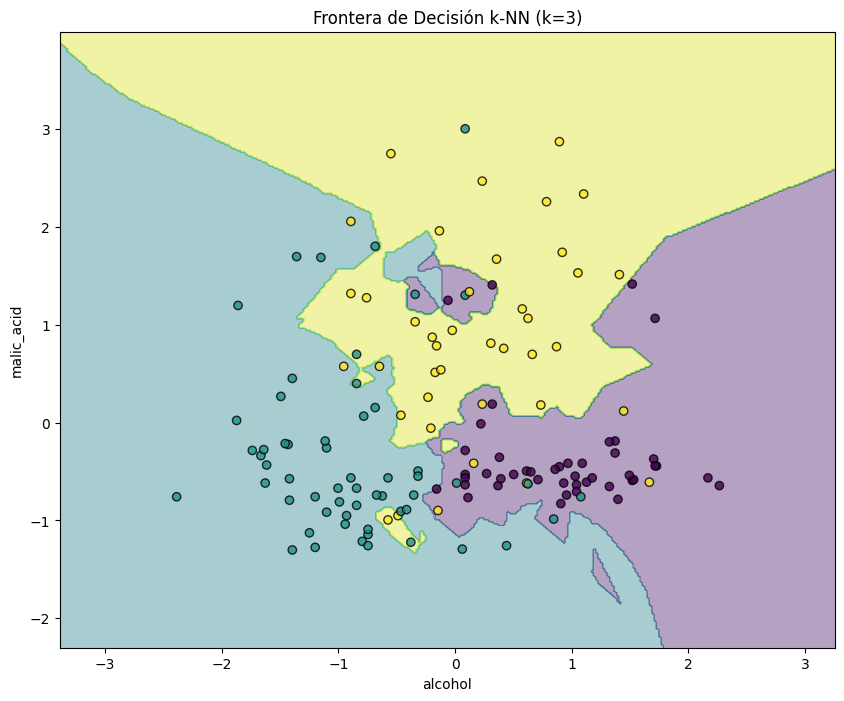

In [ ]:
def plot_decision_boundary(X, y, model, title="Decision Boundary"):
    h = 0.02  # Tamaño del paso en la malla

    # Crear una malla de puntos
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predecir para cada punto en la malla
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Dibujar el contorno y los puntos
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8, edgecolor='k')
    plt.title(title)
    plt.xlabel(wine.feature_names[0])
    plt.ylabel(wine.feature_names[1])
    plt.show()

# Entrenamos el modelo
X_subset = X_train_scaled[:, :2]
y_train_reset = np.array(y_train)  # Convertir a numpy si es necesario
knn_manual = SimpleKNN(k=3)
knn_manual.fit(X_subset, y_train_reset)

# Visualizamos la frontera de decisión
plot_decision_boundary(X_subset, y_train_reset, knn_manual,
                       "Frontera de Decisión k-NN (k=3)")


## 4. Comparación con scikit-learn

In [ ]:
# Implementación de scikit-learn
knn_sklearn = KNeighborsClassifier(n_neighbors=3)
knn_sklearn.fit(X_train_scaled, y_train)

# Predicciones con ambos modelos
y_pred_manual = knn_manual.predict(X_test_scaled[:, :2])
y_pred_sklearn = knn_sklearn.predict(X_test_scaled)

# Comparación de resultados
print("Resultados con nuestra implementación:")
print(classification_report(y_test, y_pred_manual))
print("\nResultados con scikit-learn:")
print(classification_report(y_test, y_pred_sklearn))

Resultados con nuestra implementación:
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       1.00      0.86      0.92        14
           2       0.67      1.00      0.80         8

    accuracy                           0.89        36
   macro avg       0.89      0.90      0.88        36
weighted avg       0.93      0.89      0.90        36


Resultados con scikit-learn:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.86      0.92        14
           2       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



## 5. Análisis de Diferentes Valores de k

Vamos a ver cómo cambia la precisión con diferentes valores de k.

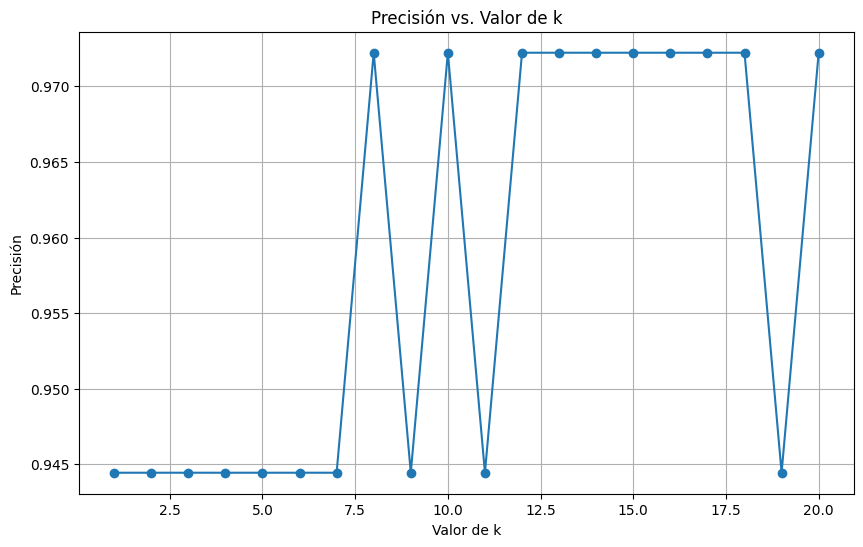

In [ ]:
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, 'o-')
plt.xlabel('Valor de k')
plt.ylabel('Precisión')
plt.title('Precisión vs. Valor de k')
plt.grid(True)
plt.show()